# DMML Terminal Assesment

Vani Mirg: x19211538

# Dataset 1: NEW YORK CITY AIRBNB 

Research Question:
    
Which is the most expensive Airbnb in New York City?

In [1]:
#Importing the libraries
#linear algebra
import numpy as np 
import math

#data tools
from copy import copy
import pandas as pd
from scipy.stats import boxcox
from scipy.special import boxcox1p
from scipy.special import inv_boxcox
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image


#plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly as plotly                
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)


#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')



#metrics
from sklearn.metrics import mean_squared_error, r2_score

#interactive map library
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

#statistics
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")

# Data Gathering

In [2]:
df= pd.read_csv('airbnbnyc.csv')

In [3]:
df=pd.read_csv('airbnbnyc.csv')
df.head(5)


print('Number of features: {}'.format(df.shape[1]))
print('Number of features: {}'.format(df.shape[0]))

Number of features: 16
Number of features: 48895


In [4]:
print('Number of quantitative features: {}'.format(len([d for d in df.columns if df.dtypes[d] != 'object'])))
print('Number of qualitative features: {}'.format(len([d for d in df.columns if df.dtypes[d] == 'object'])))

Number of quantitative features: 10
Number of qualitative features: 6


In [5]:
#checking if there any missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

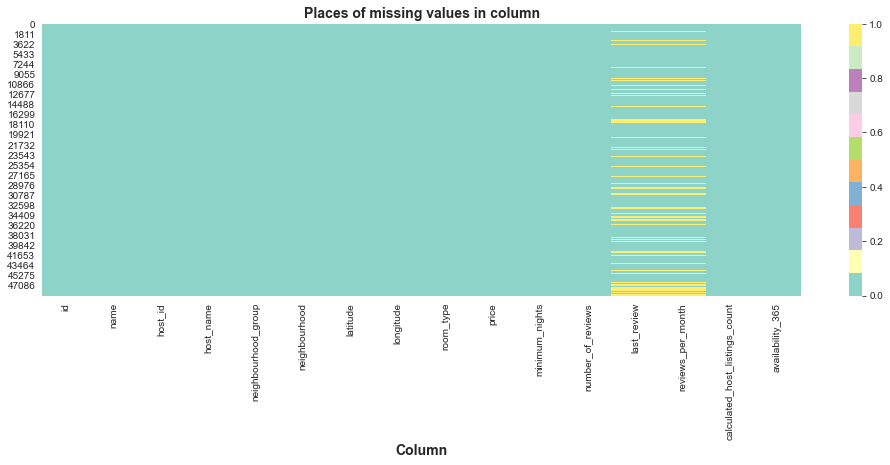

In [6]:
#plottimg heatmap of missing values

plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(), cbar=True, cmap="Set3")
plt.xlabel("Column", size=14, weight="bold")
plt.title("Places of missing values in column", fontweight='bold', size=14)
plt.show()

In [7]:
count= df.isnull().sum().sort_values(ascending=False)
percentage=((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data=pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing Values for the column:')

missing_data

Count and percentage of missing Values for the column:


Count  Percentage
reviews_per_month               10052   20.558339
last_review                     10052   20.558339
host_name                          21    0.042949
name                               16    0.032723
availability_365                    0    0.000000
calculated_host_listings_count      0    0.000000
number_of_reviews                   0    0.000000
minimum_nights                      0    0.000000
price                               0    0.000000
room_type                           0    0.000000
longitude                           0    0.000000
latitude                            0    0.000000
neighbourhood                       0    0.000000
neighbourhood_group                 0    0.000000
host_id                             0    0.000000
id                                  0    0.000000

In [8]:
df['name'].value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Private Room                                          11
                                                      ..
Sunny and Cozy apt in Midtown                          1
jungle oasis loft in red hook                          1
Cozy Renovated 2 Bedroom Apartment Heart of Brklyn     1
Beautiful room in beautiful apartment super clean      1
Private East Village Room With Great Light/Views       1
Name: name, Length: 47896, dtype: int64

In [9]:
df = df[df.name != '#NAME?']
df['name'].value_counts()


Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Private Room                                          11
                                                      ..
Private Room in Riverdale NY                           1
Sunny and Cozy apt in Midtown                          1
jungle oasis loft in red hook                          1
Cozy Renovated 2 Bedroom Apartment Heart of Brklyn     1
Private East Village Room With Great Light/Views       1
Name: name, Length: 47895, dtype: int64

# Visualisation 1: Top 10 Airbnb in NYC boroughs

[Text(0, 0, 'Hillside Hotel'),
 Text(1, 0, 'Home away from home'),
 Text(2, 0, 'New york Multi-unit building'),
 Text(3, 0, 'Brooklyn Apartment'),
 Text(4, 0, 'Private Room'),
 Text(5, 0, 'Loft Suite @ The Box House Hotel'),
 Text(6, 0, 'Private room'),
 Text(7, 0, 'Artsy Private BR in Fort Greene Cumberland'),
 Text(8, 0, 'Private room in Williamsburg'),
 Text(9, 0, 'Beautiful Brooklyn Brownstone')]

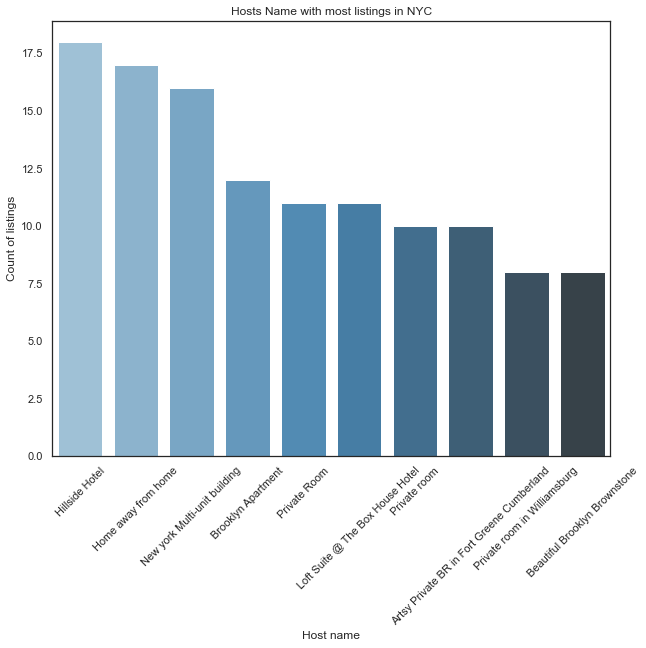

In [10]:
host_name=df.name.value_counts().head(10)
host_name

top_host_name= df.calculated_host_listings_count.max()
top_host_name
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

top_host_name_df= pd.DataFrame(host_name)
top_host_name_df.reset_index(inplace=True)
top_host_name_df.rename(columns={'index':'Host_Name','name' :'P_count'},inplace=True)
top_host_name_df
a=sns.barplot(x='Host_Name', y='P_count', data=top_host_name_df,
             palette='Blues_d')
a.set_title('Hosts Name with most listings in NYC')
a.set_ylabel('Count of listings')
a.set_xlabel('Host name')
a.set_xticklabels(a.get_xticklabels(),rotation=45)

# Visualisation 2: Top 10 hosts of Airbnb

[Text(0, 0, 'Michael'),
 Text(1, 0, 'David'),
 Text(2, 0, 'Sonder (NYC)'),
 Text(3, 0, 'John'),
 Text(4, 0, 'Alex'),
 Text(5, 0, 'Blueground'),
 Text(6, 0, 'Sarah'),
 Text(7, 0, 'Daniel'),
 Text(8, 0, 'Jessica'),
 Text(9, 0, 'Maria')]

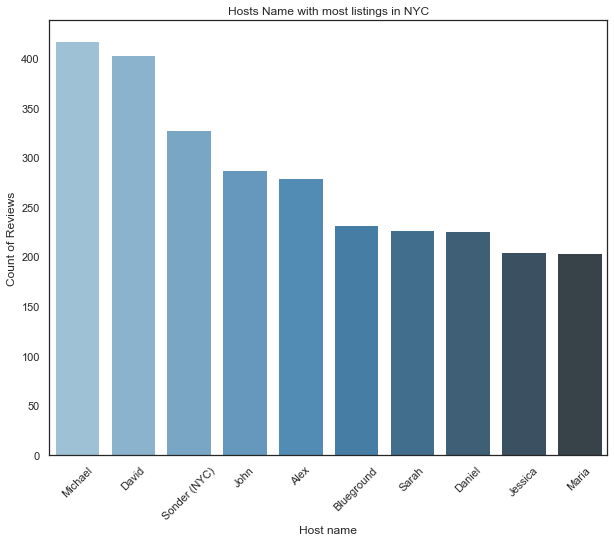

In [11]:
top_name=df.host_name.value_counts().head(10)
host_name

top_reviews= df.number_of_reviews.max()
top_reviews
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

top_name_df= pd.DataFrame(top_name)
top_name_df.reset_index(inplace=True)
top_name_df
top_name_df.rename(columns={'index':'Host_Name','host_name' :'review_count'},inplace=True)
top_name_df
a=sns.barplot(x='Host_Name', y='review_count', data=top_name_df,
             palette='Blues_d')
a.set_title('Hosts Name with most listings in NYC')
a.set_ylabel('Count of Reviews')
a.set_xlabel('Host name')
a.set_xticklabels(a.get_xticklabels(),rotation=45)

# Visualisation 3: Analysis of prices of Airbnb in neighborhood

In [12]:
#Visualisations for Neighbourhood areas

#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [13]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
    
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

Brooklyn  Manhattan   Queens  Staten Island   Bronx
Stats                                                     
min         0.0        0.0     10.0           13.0     0.0
25%        60.0       95.0     50.0           50.0    45.0
50%        90.0      150.0     75.0           75.0    65.0
75%       150.0      220.0    110.0          110.0    99.0
max     10000.0    10000.0  10000.0         5000.0  2500.0

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

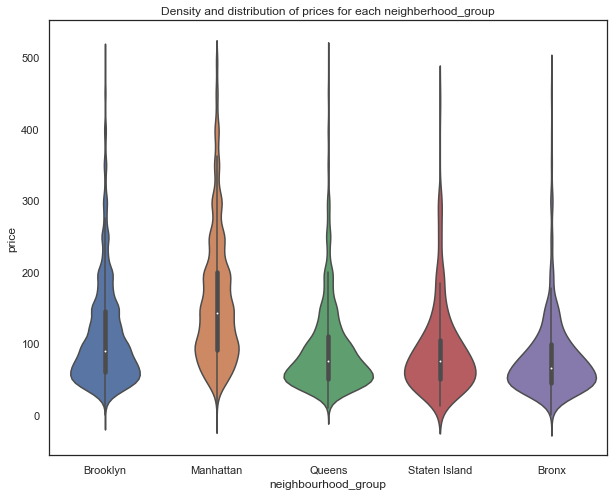

In [14]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

with a statistical table and a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs.

First, we can state that Manhattan has the highest range of prices for the listings   with   $150 price as a  verage observation,   followed by Brooklyn with $90 per night.

Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. 

This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living


# Visualisation 4: Room type in Neighborhood

In [15]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
df.neighbourhood.value_counts().head(10)

Williamsburg          3913
Bedford-Stuyvesant    3714
Harlem                2656
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1957
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

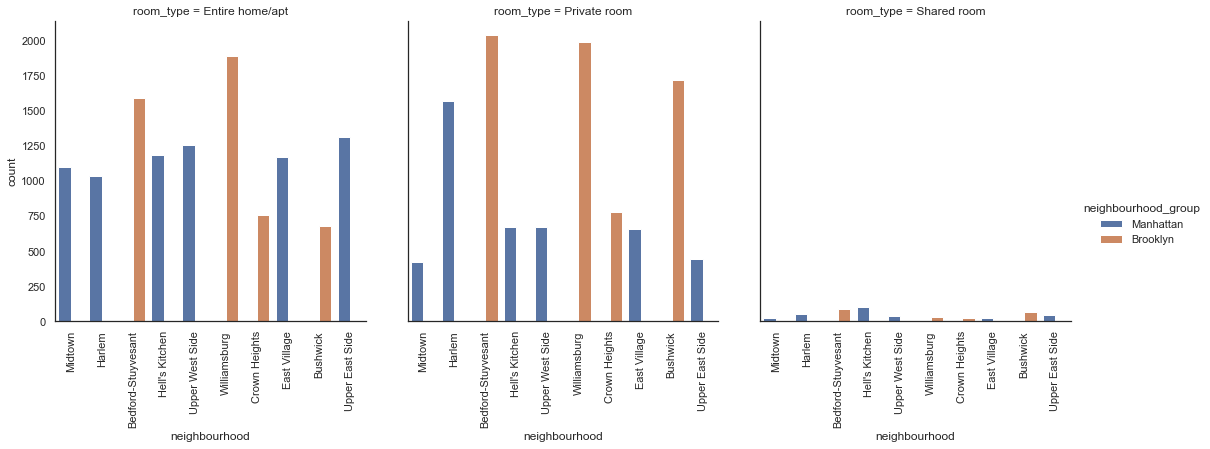

In [16]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

The observation that is definitely contrasted the most is that 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods.

Then, we can see that for these 10 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most listing availability.
    
We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

# Visualisation 5: Room Type across Boroughs

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

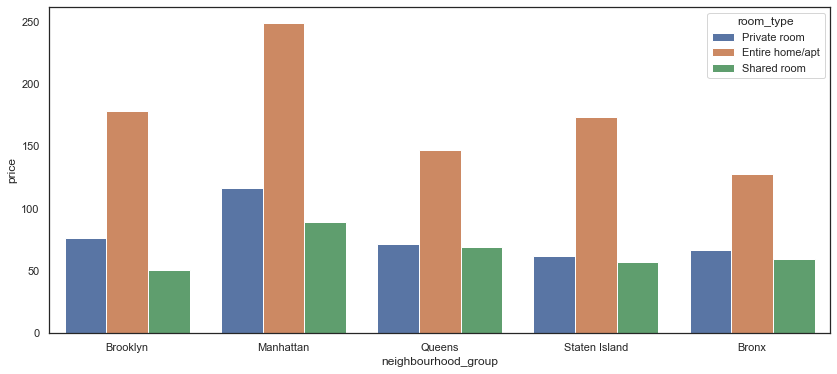

In [17]:
plt.figure(figsize=(14,6))
sns.barplot(df.neighbourhood_group, df.price, hue=df.room_type, ci=None)

From the above graph we can come to a conclusion that:

Manhattan is the most expensive neighbour_hood

The price of entire home is more than any other roomtyoe

Bronx is the cheapest

# Visualisation 6: Scatterplot showcasing the boroughs

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

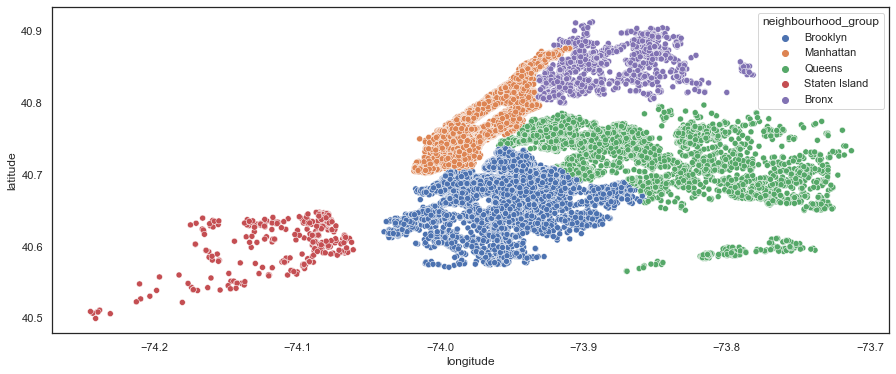

In [18]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)

# Visualisation 7: Top neighbourhood

Text(0.5, 1.0, 'Neighnourhood Group')

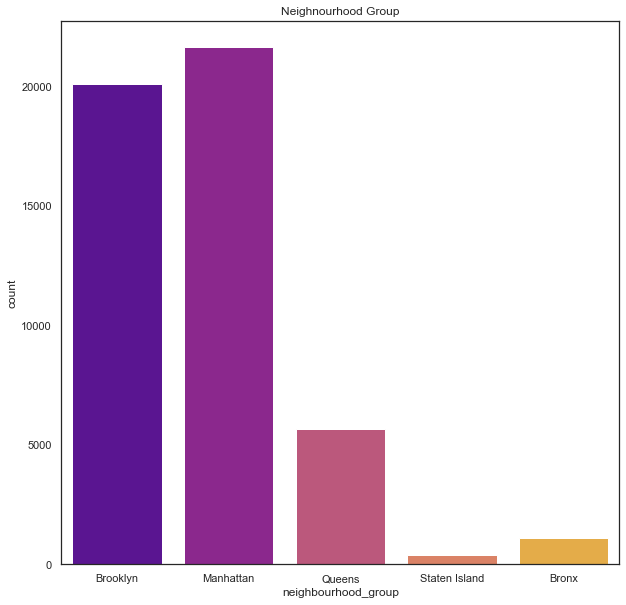

In [19]:
sns.countplot(df['neighbourhood_group'], palette='plasma')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighnourhood Group')

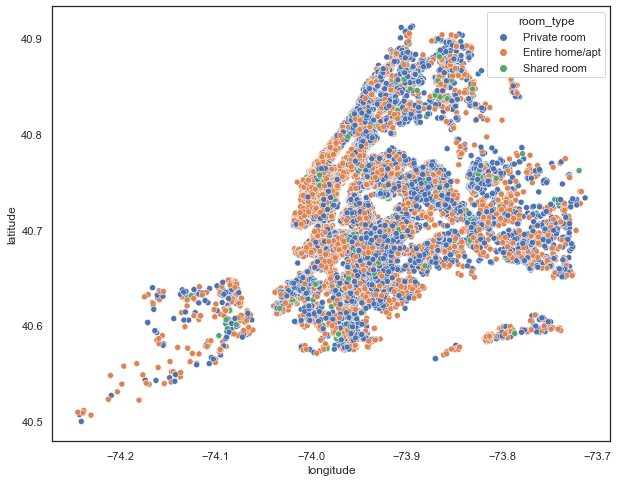

In [20]:
sns.scatterplot(df.longitude, df.latitude, hue=df.room_type)
plt.ioff()

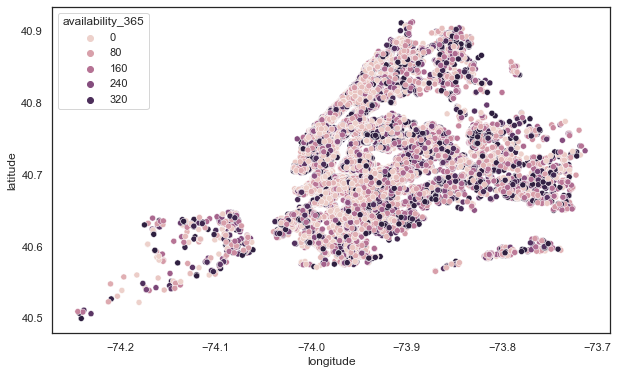

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365)
plt.ioff()

# Visualisation 8: Map showcasing the distribution of airbnb in NYC

In [22]:
#Distribution of Airbnb hotels

m = folium.Map([40.7128,-74.0060], zoom_start=11)
HeatMap(df[['latitude', 'longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple', 0.6:'orange',1.0:'red'}).add_to(m)
display(m)

# Visualisation 9:Top neighbourhoods

In [23]:
listings = df['neighbourhood_group'].value_counts()
print(listings)

Manhattan        21658
Brooklyn         20097
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


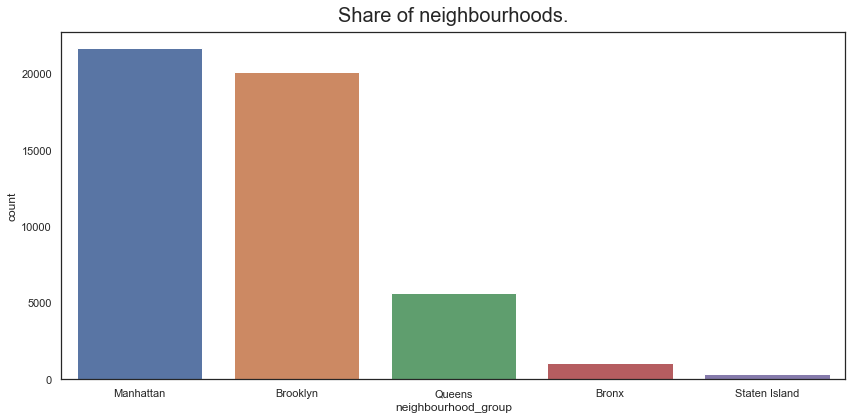

In [24]:
plt.figure(figsize=(12,6))
listings1plot=sns.countplot(df['neighbourhood_group'],order=df['neighbourhood_group'].value_counts().index)
plt.title('Share of neighbourhoods.',size=20,pad=10)
plt.tight_layout()

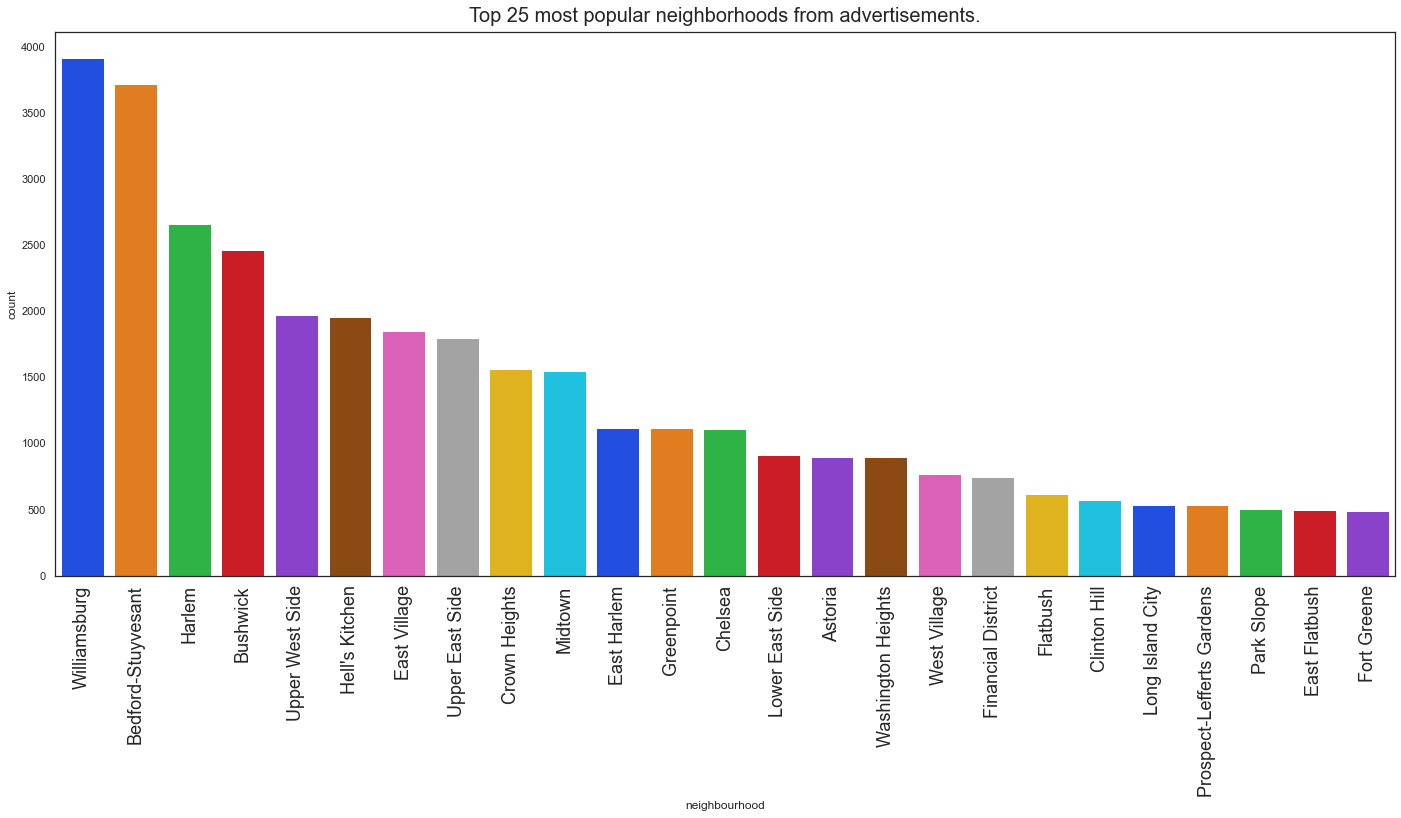

In [25]:
#Top 25 airbnb
plt.figure(figsize=(24,10))
listings2plot = sns.countplot(df['neighbourhood'],order=df['neighbourhood'].value_counts().index[0:25],palette='bright')
listings2plot.set_xticklabels(listings2plot.get_xticklabels(),rotation=90, size=18)
plt.title('Top 25 most popular neighborhoods from advertisements.',size=20,pad=10)
plt.savefig('popular_neighbourhoods.png',bbox_inches='tight')
plt.show()

In [26]:
df[df.neighbourhood=='Williamsburg'].head(1)

id                              name  host_id      host_name  \
15  6848  Only 2 stops to Manhattan studio    15991  Allen & Irina   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
15            Brooklyn  Williamsburg  40.70837  -73.95352  Entire home/apt   

    price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
15    140               2                148  29-06-2019                1.2   

    calculated_host_listings_count  availability_365  
15                               1                46

In [27]:
df[df.neighbourhood=='Bedford-Stuyvesant'].head(1)

id             name  host_id host_name neighbourhood_group  \
6  5121  BlissArtsSpace!     7356     Garon            Brooklyn   

        neighbourhood  latitude  longitude     room_type  price  \
6  Bedford-Stuyvesant  40.68688  -73.95596  Private room     60   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
6              45                 49  05-10-2017                0.4   

   calculated_host_listings_count  availability_365  
6                               1                 0

In [28]:
df[df.neighbourhood=='Harlem'].head(1)

id                                 name  host_id  host_name  \
2  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
2           Manhattan        Harlem  40.80902   -73.9419  Private room    150   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
2               3                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  
2                               1               365

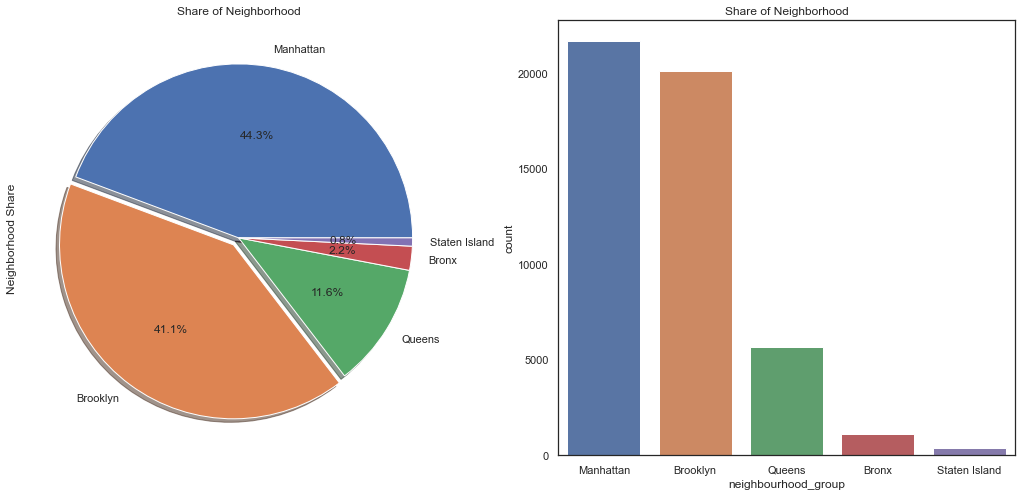

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.05,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('neighbourhood_group',data=df,ax=ax[1],order=df['neighbourhood_group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
plt.show()
plt.ioff()

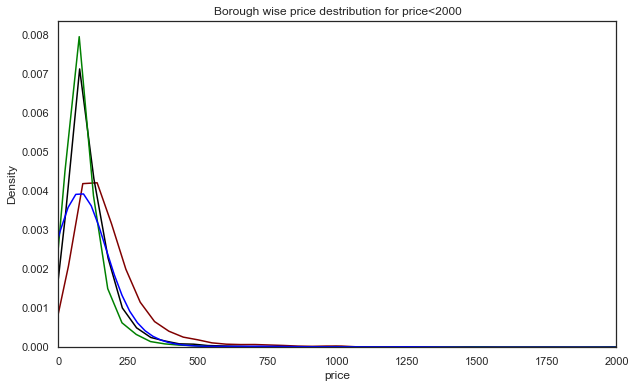

In [30]:
plt.figure(figsize=(10,6))
sns.distplot(df[df.neighbourhood_group=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(df[df.neighbourhood_group=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(df[df.neighbourhood_group=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(df[df.neighbourhood_group=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(df[df.neighbourhood_group=='Long Island'].price,color='lavender',hist=False,label='Long Island')
plt.title('Borough wise price destribution for price<2000')
plt.xlim(0,2000)
plt.show()

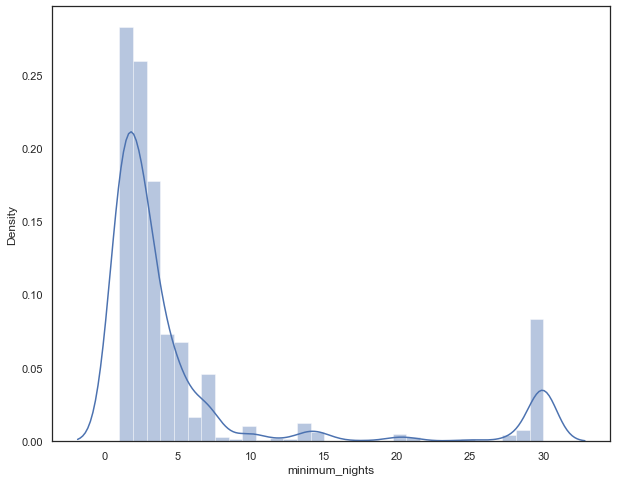

In [31]:
sns.distplot(df[(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.ioff()

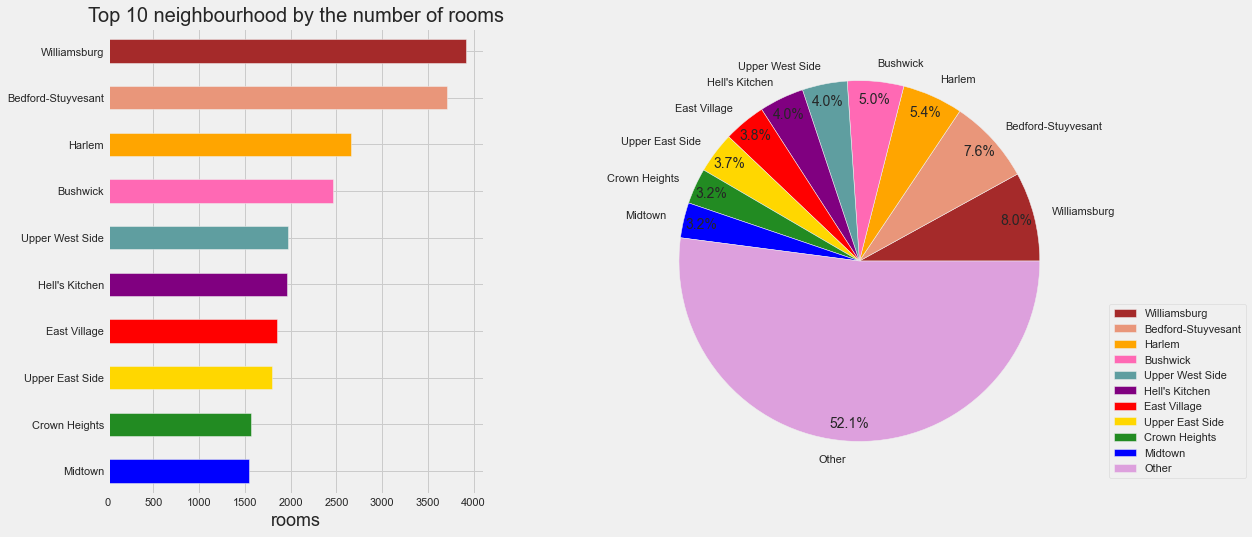

In [32]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.neighbourhood.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 neighbourhood by the number of rooms",size=20)
ax[0].set_xlabel('rooms',size=18)


count=df['neighbourhood'].value_counts()
groups=list(df['neighbourhood'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')
pass

Text(0.5, 1.0, 'Share of Room Type')

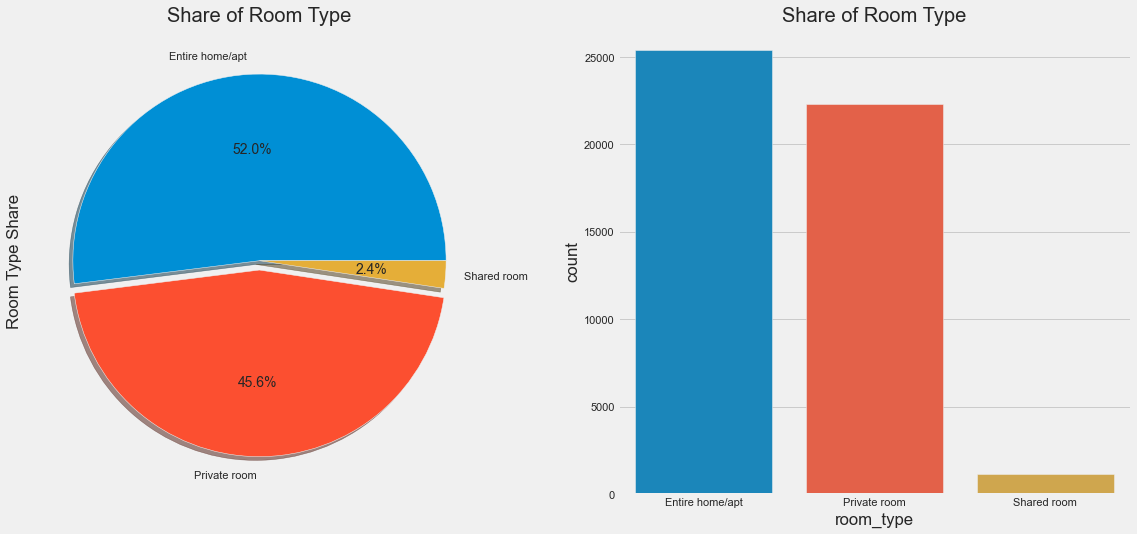

In [33]:
plt.style.use('fivethirtyeight')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['room_type'].value_counts().plot.pie(explode=[0,0.05,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Room Type')
ax[0].set_ylabel('Room Type Share')
sns.countplot('room_type',data=df,ax=ax[1],order=df['room_type'].value_counts().index)
ax[1].set_title('Share of Room Type')
# plt.show()

# Price across districts

In [34]:
df['price'].describe()

count    48885.000000
mean       152.737363
std        240.175390
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

The mean price of an advertisement will allow to better representation of advertisements locations by scattered plots.

# Removing missing values

In [35]:
df['last_review'].head()

0    19-10-2018
1    21-05-2019
2           NaN
3    05-07-2019
4    19-11-2018
Name: last_review, dtype: object

In [36]:
df['reviews_per_month'].head()

0    0.21
1    0.38
2     NaN
3    4.64
4    0.10
Name: reviews_per_month, dtype: float64

Analysing the missing values, the following conclusions cab be drawn:

review_per_monnth: Fill NaN with 0
    
last_review: Feature to drop

In [37]:
df['reviews_per_month'].fillna(value=0, inplace=True)
df.drop('last_review',axis=1,inplace=True)

In [38]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [39]:
df.dropna()

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
1                   0.38                               2               355  
2                   0.00                               1               365  
3                   4.64                               1               194  
4                   0.10                               1                 0  
...                  ...                             ...               ...  
48890               0.00                               2                 9  
48891               0.00                               2                36  
48892               0.00                               1                27  
48893               0.00                               6                 2  
48894               0.00                               1                23  

[48848 rows x 15 columns]

In [40]:
df['name'].value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Private Room                                          11
                                                      ..
Private Room in Riverdale NY                           1
Sunny and Cozy apt in Midtown                          1
jungle oasis loft in red hook                          1
Cozy Renovated 2 Bedroom Apartment Heart of Brklyn     1
Private East Village Room With Great Light/Views       1
Name: name, Length: 47895, dtype: int64

In [41]:
df['name'].isnull().sum()

16

In [42]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [43]:
df=df.dropna()

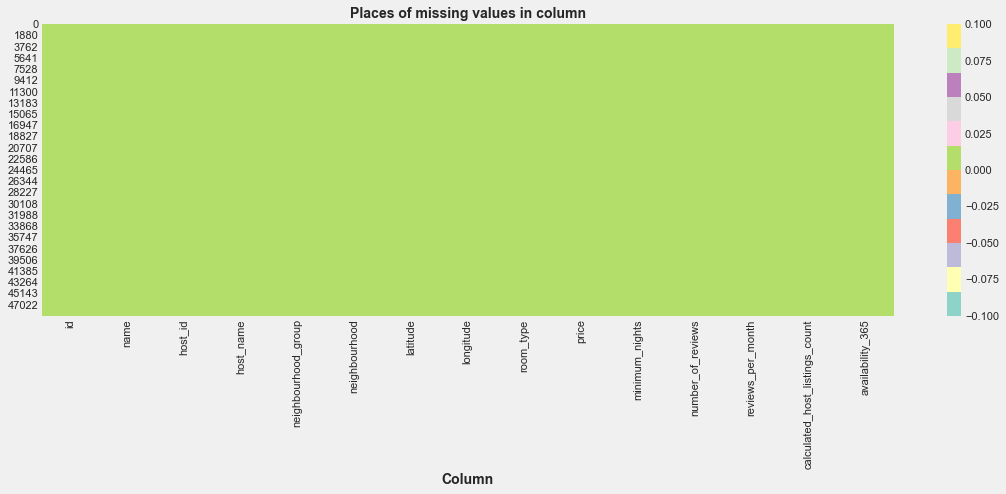

In [44]:
plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(), cbar=True, cmap="Set3")
plt.xlabel("Column", size=14, weight="bold")
plt.title("Places of missing values in column", fontweight='bold', size=14)
plt.show()

# Removing Outliers



To detect outliers in target-'price', Tukey test will be implemented which defines and interquartile range comprised between the 1st and the #rd Quartile of the distrubution values(IQR). Outliers are rows whose values are outside IQR

In [50]:
def tukey_outliers(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    outliers_index = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
    return outliers_index

In [51]:
outliers_index = tukey_outliers(df,'price')
df.drop(outliers_index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [52]:
df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
45872  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
45873  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
45874  36485431            Sunny Studio at Historical Neighborhood  23492952   
45875  36485609               43rd St. Time Square-cozy single bed  30985759   
45876  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
45872        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
45873        Marisol            Brooklyn            Bushwick  40.70184   
45874  Ilgar & Aysel           Manhattan              Harlem  40.81475   
45875            Taz           Manhattan      Hell's Kitchen  40.75751   
45876     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
45872  -73.94995     Private room     70               2                  0   
45873  -73.93317     Private room     40               4                  0   
45874  -73.94867  Entire home/apt    115              10                  0   
45875  -73.99112      Shared room     55               1                  0   
45876  -73.98933     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
1                   0.38                               2               355  
2                   0.00                               1               365  
3                   4.64                               1               194  
4                   0.10                               1                 0  
...                  ...                             ...               ...  
45872               0.00                               2                 9  
45873               0.00                               2                36  
45874               0.00                               1                27  
45875               0.00                               6                 2  
45876               0.00                               1                23  

[45877 rows x 15 columns]

Zero values in 'price'

Assuming that you cannot get a room for free(at zero cost). 0 values in target price may have a negative impact on the estimator. 

A good solution is to remove the data samples whose price is 0

In [53]:
df[df['price']==0].head()

id                                               name    host_id  \
21909  18750597  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
24077  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
24267  20523843    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
24383  20608117                    Sunny, Quiet Room in Greenpoint    1641537   
24406  20624541      Modern apartment in the heart of Williamsburg   10132166   

          host_name neighbourhood_group       neighbourhood  latitude  \
21909      Kimberly            Brooklyn  Bedford-Stuyvesant  40.69023   
24077        Anisha               Bronx     East Morrisania  40.83296   
24267  Martial Loft            Brooklyn            Bushwick  40.69467   
24383        Lauren            Brooklyn          Greenpoint  40.72462   
24406       Aymeric            Brooklyn        Williamsburg  40.70838   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
21909  -73.95428     Private room      0               4                  1   
24077  -73.88668     Private room      0               2                 55   
24267  -73.92433     Private room      0               2                 16   
24383  -73.94072     Private room      0               2                 12   
24406  -73.94645  Entire home/apt      0               5                  3   

       reviews_per_month  calculated_host_listings_count  availability_365  
21909               0.05                               4                28  
24077               2.56                               4               127  
24267               0.71                               5                 0  
24383               0.53                               2                 0  
24406               0.15                               1                73

In [54]:
print('Together we have {} listings with price equal to 0.'.format(len(df[df['price']==0])))

Together we have 11 listings with price equal to 0.


In [55]:
df[df['price']==0].index

Int64Index([21909, 24077, 24267, 24383, 24406, 24420, 24421, 24422, 24869,
            25425, 25449],
           dtype='int64')

In [56]:
df.drop(df[df['price']==0].index, inplace=True)

In [57]:
df.reset_index(drop=True, inplace=True)

In [58]:
df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
45861  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
45862  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
45863  36485431            Sunny Studio at Historical Neighborhood  23492952   
45864  36485609               43rd St. Time Square-cozy single bed  30985759   
45865  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
45861        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
45862        Marisol            Brooklyn            Bushwick  40.70184   
45863  Ilgar & Aysel           Manhattan              Harlem  40.81475   
45864            Taz           Manhattan      Hell's Kitchen  40.75751   
45865     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
45861  -73.94995     Private room     70               2                  0   
45862  -73.93317     Private room     40               4                  0   
45863  -73.94867  Entire home/apt    115              10                  0   
45864  -73.99112      Shared room     55               1                  0   
45865  -73.98933     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
1                   0.38                               2               355  
2                   0.00                               1               365  
3                   4.64                               1               194  
4                   0.10                               1                 0  
...                  ...                             ...               ...  
45861               0.00                               2                 9  
45862               0.00                               2                36  
45863               0.00                               1                27  
45864               0.00                               6                 2  
45865               0.00                               1                23  

[45866 rows x 15 columns]

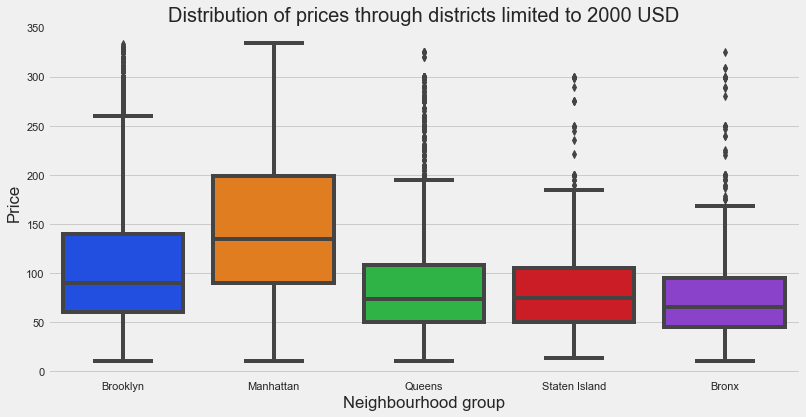

In [59]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df.price <2000], x='neighbourhood_group', y='price', palette='bright')
plt.title('Distribution of prices through districts limited to 2000 USD', fontsize=20)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")
plt.show()

In [60]:
df.groupby(["neighbourhood_group"])['price'].mean()

neighbourhood_group
Bronx             77.390815
Brooklyn         105.779045
Manhattan        145.957865
Queens            88.919317
Staten Island     89.235616
Name: price, dtype: float64

# Distribution of price (after tukey test) and without price equal to 0

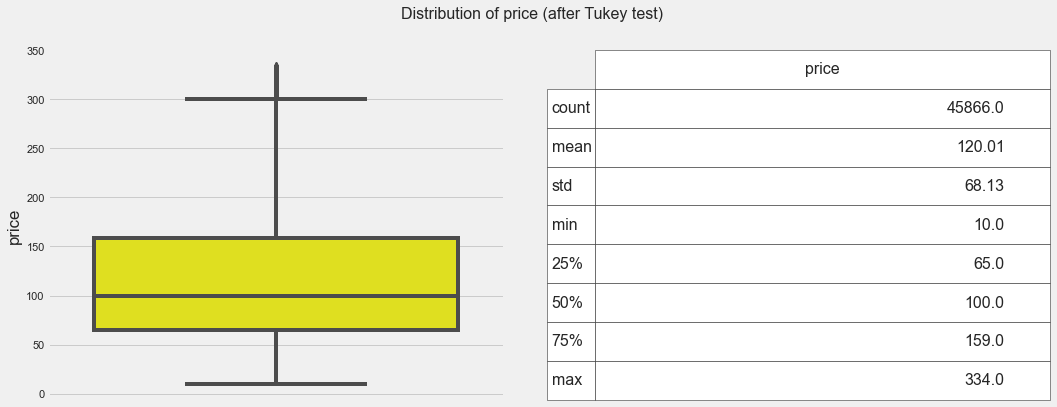

In [61]:
fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
sns.boxplot(y = df['price'], ax=ax1, color='yellow')
describe = df['price'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
ax2.axis('off')
font_size = 16
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of price (after Tukey test)', fontsize=16)
plt.show()

# Boxplots of particular Feature

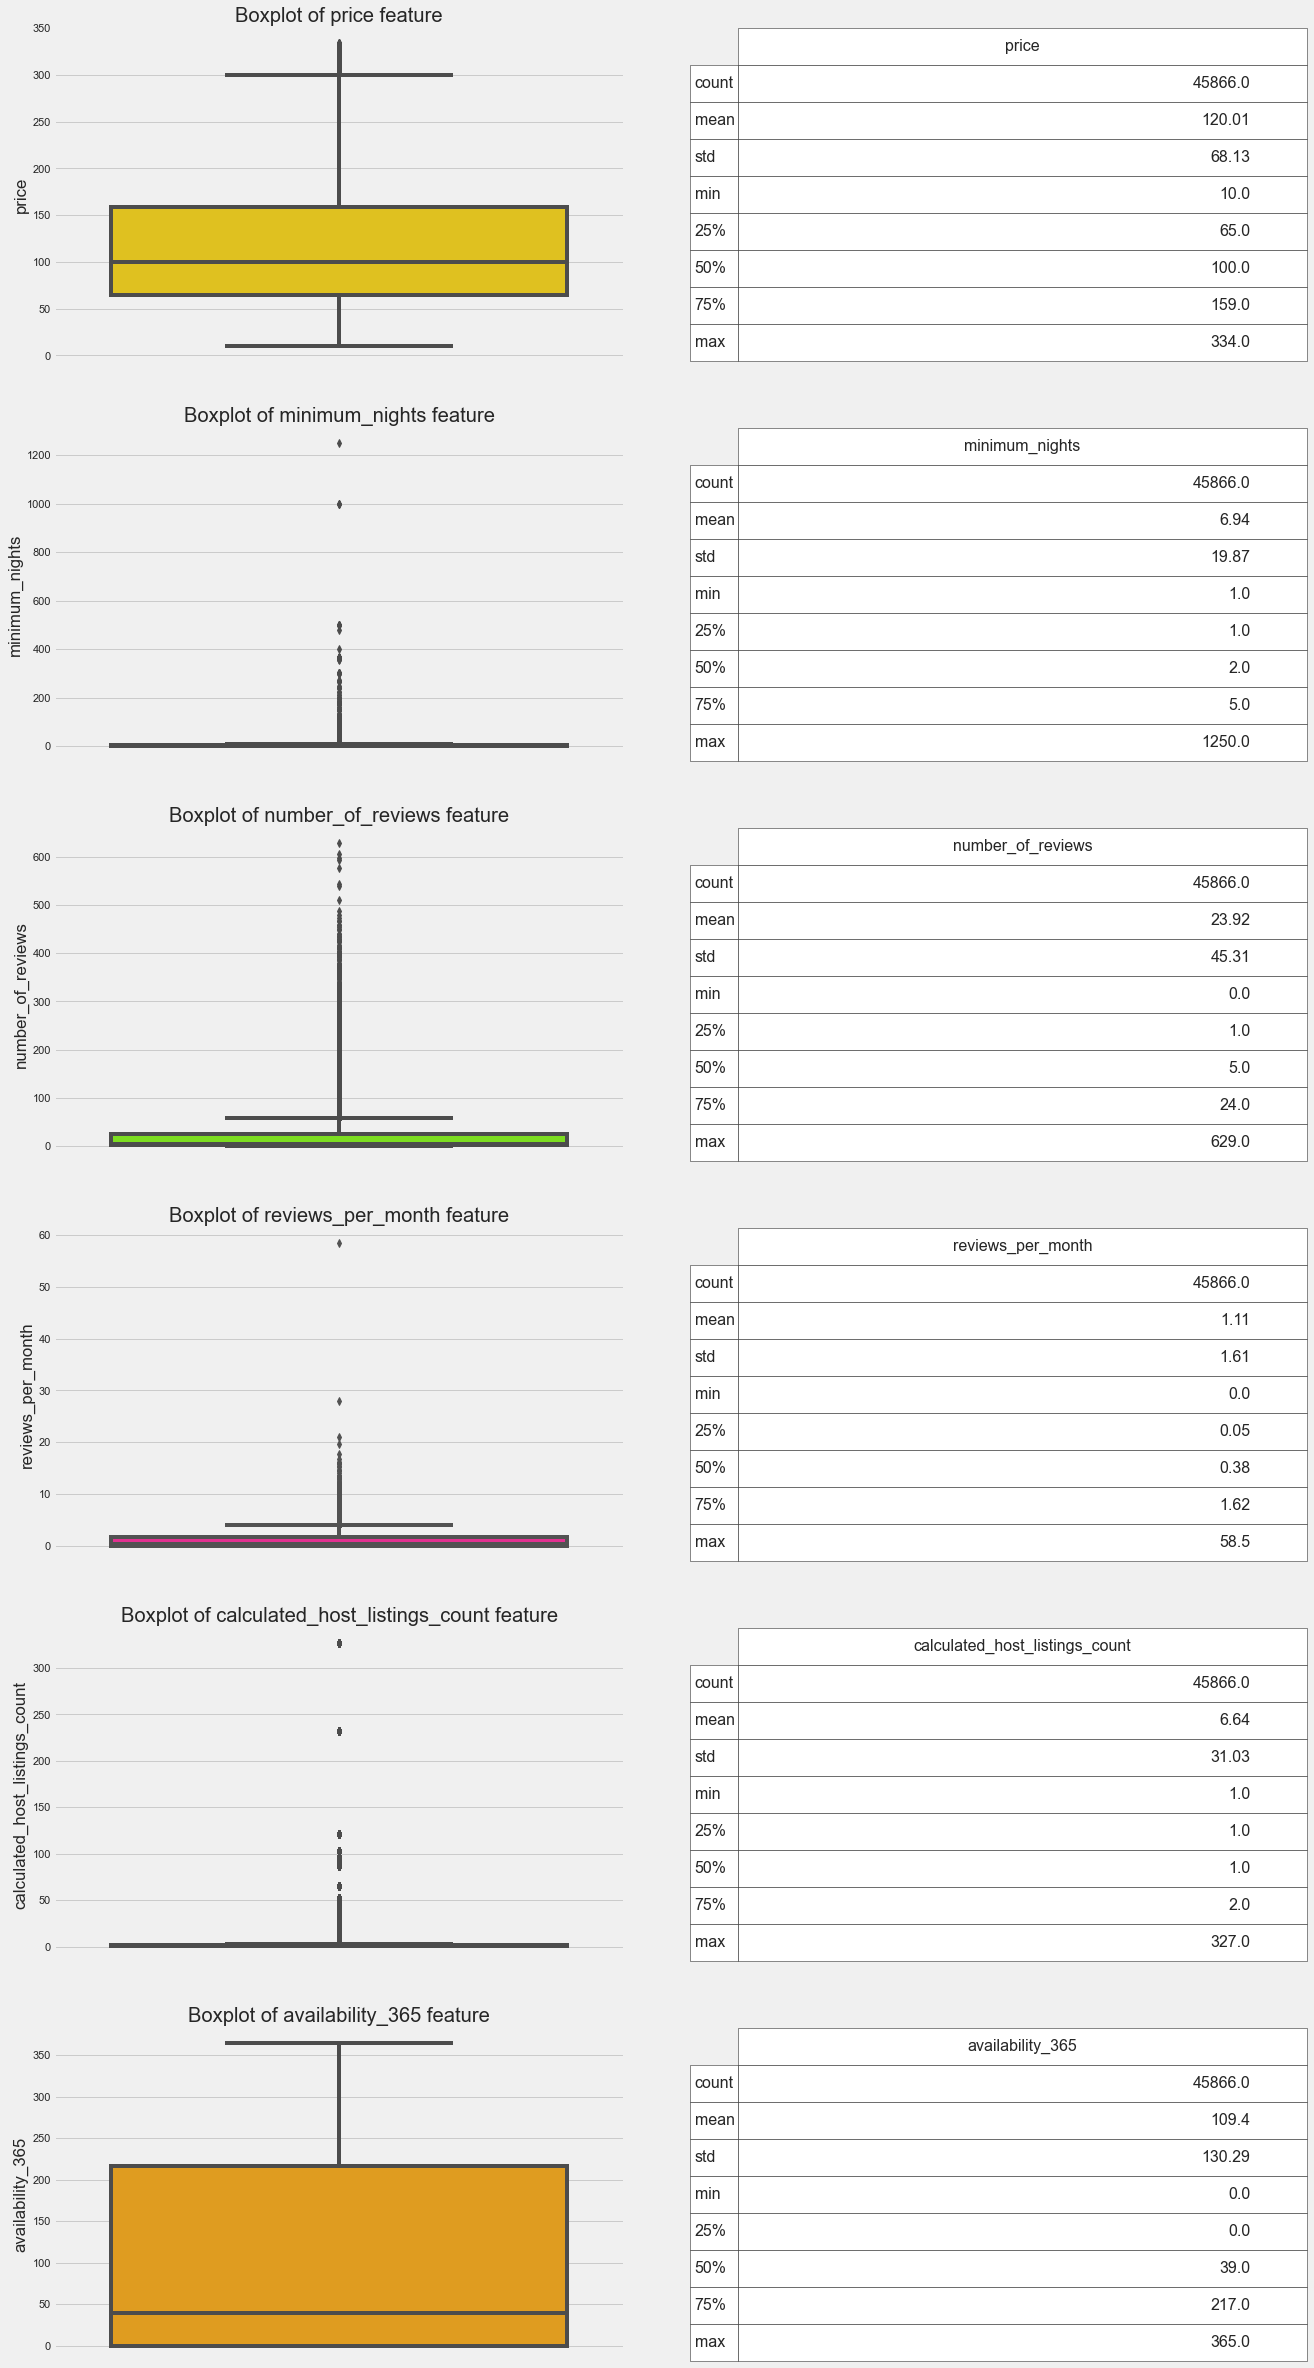

In [62]:
dists = df[['price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]

fig, ax = plt.subplots(6,2,figsize=(20,40))
bbox = [0, 0, 1, 1]
fontsize = 15
colors = ['gold','blue','lawngreen','deeppink','red','orange']

for i in range(len(dists.columns)):
    describe = df[dists.columns[i]].describe().to_frame().round(2)
    sns.boxplot(y=df[dists.columns[i]],ax=ax[i][0], color=colors[i])
    table = ax[i][1].table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
    table.set_fontsize(font_size)
    ax[i][1].axis('off')
    ax[i][0].title.set_text('Boxplot of {} feature'.format(dists.columns[i]))



plt.show()

# Box-Cox transformation on quantitative features

In [63]:
dists= df[['price', 'minimum_nights',
       'calculated_host_listings_count','number_of_reviews','reviews_per_month','availability_365']]

skewed_features = []
for column in dists:
    skew = abs(df[column].skew())
    print('{:15}'.format(column), 
          'Skewness: {:05.2f}'.format(skew),'Min value: {}'.format(df[column].min()))

price           Skewness: 00.92 Min value: 10
minimum_nights  Skewness: 21.92 Min value: 1
calculated_host_listings_count Skewness: 08.40 Min value: 1
number_of_reviews Skewness: 03.63 Min value: 0
reviews_per_month Skewness: 03.32 Min value: 0.0
availability_365 Skewness: 00.81 Min value: 0


To transform skewed features we need to use two types of Box-Cox transformation.Becouse some of features have got samples with values are near 0, this causes an error in boxcox transformation from SciPy package. It is possible to bypass this error by using boxcox1p transformation but for this type of transformation we must calculate lambda coefficient manually.

With the following transformation we are able to calculate the lambda coefficient for samples with values which are close to zero.

In [64]:
##yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

In [65]:
df['price'],price_lambda = boxcox(df['price'])
print('"price lambda": {}'.format(price_lambda))

"price lambda": 0.08415948794051062


In [66]:
df['minimum_nights'],lam = boxcox(df['minimum_nights'])
print('"minimum_nights lambda": {}'.format(lam))

"minimum_nights lambda": -0.46426957998881513


In [67]:
df['calculated_host_listings_count'],lam = boxcox(df['calculated_host_listings_count'])
print('calculated_host_listings_count: {}'.format(lam))

calculated_host_listings_count: -1.3226649899632723


In [68]:
values = df['number_of_reviews'].values
data1 = pd.DataFrame({'x':values})
pt.fit(data1)
print(pt.lambdas_)

[-0.12797528]


In [69]:
df['number_of_reviews']= boxcox1p(df['number_of_reviews'],pt.lambdas_)
print('"number_of_reviews lambda: {}"'.format(pt.lambdas_))

"number_of_reviews lambda: [-0.12797528]"


In [70]:
values = df['reviews_per_month'].values
data2 = pd.DataFrame({'x':values})
pt.fit(data2)
print(pt.lambdas_)

[-1.04778945]


In [71]:
df['reviews_per_month']= boxcox1p(df['reviews_per_month'],pt.lambdas_)
print('"reviews_per_month lambda: {}"'.format(pt.lambdas_))

"reviews_per_month lambda: [-1.04778945]"


In [72]:
values = df['availability_365'].values
data3 = pd.DataFrame({'x':values})
pt.fit(data3)
print(pt.lambdas_)

[0.06797445]


In [73]:
df['availability_365']= boxcox1p(df['availability_365'],-1.84047863)
print('"availability_365 lambda: {}"'.format(pt.lambdas_))


"availability_365 lambda: [0.06797445]"


# Preview of features after transformation

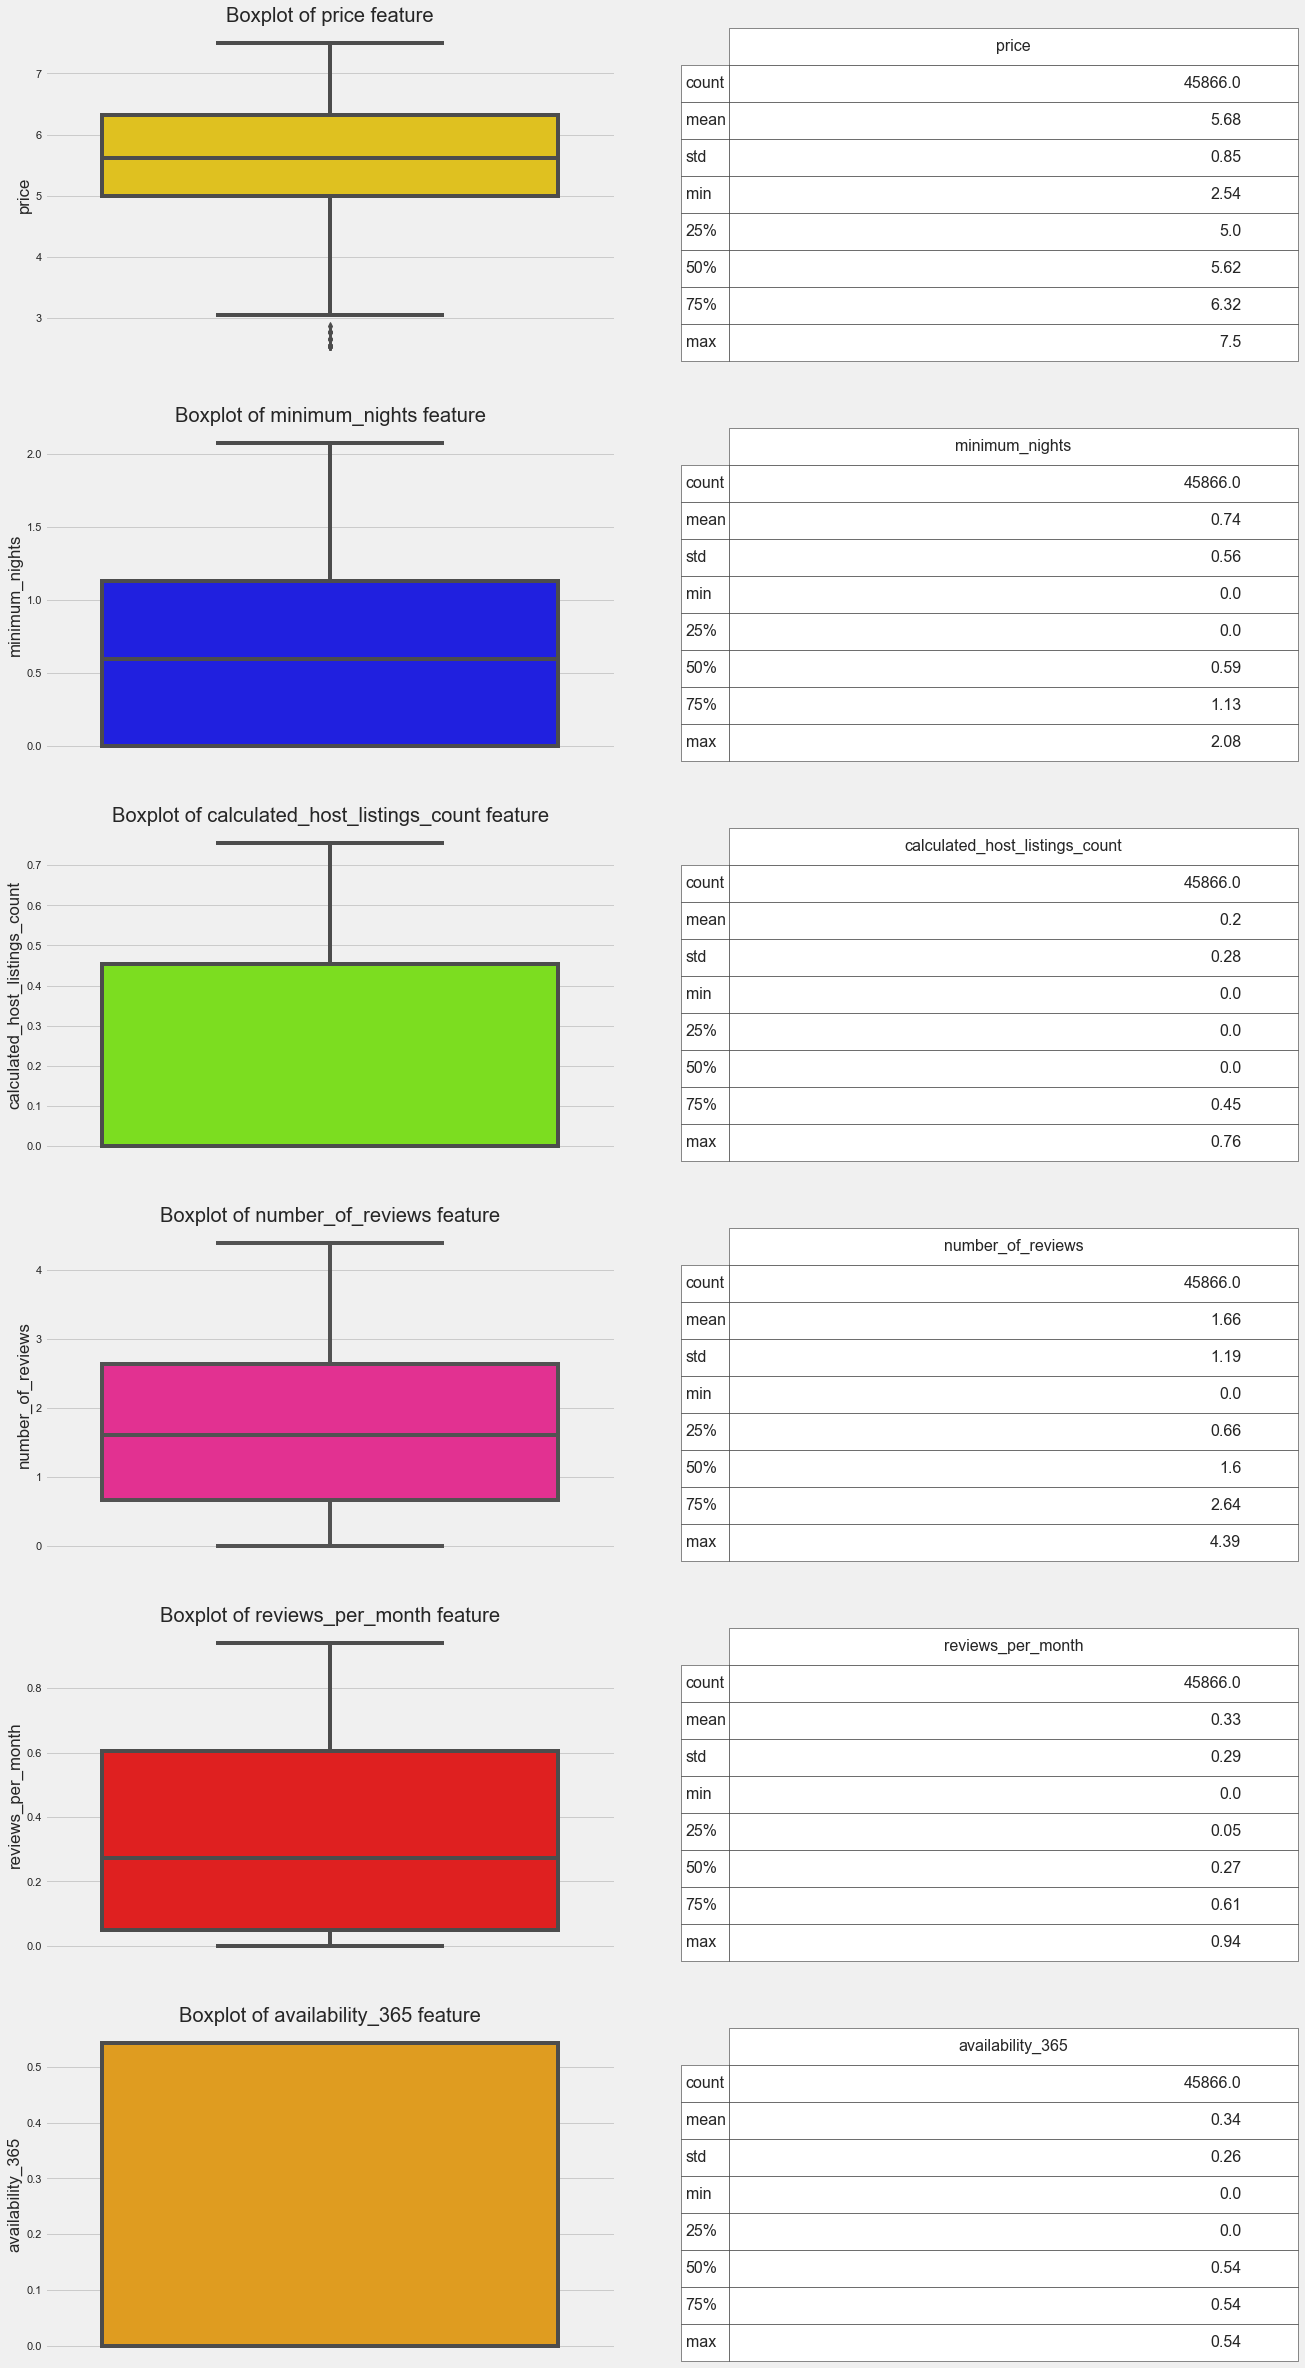

In [74]:
dists = df[['price', 'minimum_nights',
       'calculated_host_listings_count','number_of_reviews','reviews_per_month','availability_365']]

fig, ax = plt.subplots(6,2,figsize=(20,40))
bbox = [0, 0, 1, 1]
fontsize = 15
colors = ['gold','blue','lawngreen','deeppink','red','orange','darkcyan','yellow']

for i in range(len(dists.columns)):
    describe = df[dists.columns[i]].describe().to_frame().round(2)
    sns.boxplot(y=df[dists.columns[i]],ax=ax[i][0], color=colors[i])
    table = ax[i][1].table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
    table.set_fontsize(font_size)
    ax[i][1].axis('off')
    ax[i][0].title.set_text('Boxplot of {} feature'.format(dists.columns[i]))



plt.show()

In [75]:
df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
45861  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
45862  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
45863  36485431            Sunny Studio at Historical Neighborhood  23492952   
45864  36485609               43rd St. Time Square-cozy single bed  30985759   
45865  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
45861        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
45862        Marisol            Brooklyn            Bushwick  40.70184   
45863  Ilgar & Aysel           Manhattan              Harlem  40.81475   
45864            Taz           Manhattan      Hell's Kitchen  40.75751   
45865     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type     price  minimum_nights  \
0      -73.97237     Private room  6.222491        0.000000   
1      -73.98377  Entire home/apt  6.861501        0.000000   
2      -73.94190     Private room  6.232686        0.860569   
3      -73.95976  Entire home/apt  5.454105        0.000000   
4      -73.94399  Entire home/apt  5.299256        1.414384   
...          ...              ...       ...             ...   
45861  -73.94995     Private room  5.107252        0.592677   
45862  -73.93317     Private room  4.325650        1.022272   
45863  -73.94867  Entire home/apt  5.832106        1.414384   
45864  -73.99112      Shared room  4.765909        0.000000   
45865  -73.98933     Private room  5.470415        1.281198   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0               1.994335           0.172791                        0.685366   
1               3.026804           0.273367                        0.453784   
2               0.000000           0.000000                        0.000000   
3               3.998838           0.798599                        0.000000   
4               1.994335           0.090706                        0.000000   
...                  ...                ...                             ...   
45861           0.000000           0.000000                        0.453784   
45862           0.000000           0.000000                        0.453784   
45863           0.000000           0.000000                        0.000000   
45864           0.000000           0.000000                        0.685366   
45865           0.000000           0.000000                        0.000000   

       availability_365  
0              0.543327  
1              0.543326  
2              0.543327  
3              0.543304  
4              0.000000  
...                 ...  
45861          0.535492  
45862          0.542631  
45863          0.542158  
45864          0.471402  
45865          0.541771  

[45866 rows x 15 columns]

# Model Building

In [76]:
#Dropping the unwanted columns:
df.drop('id', axis=1, inplace=True)
df.drop('host_id', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.drop('host_name', axis=1, inplace=True)
    

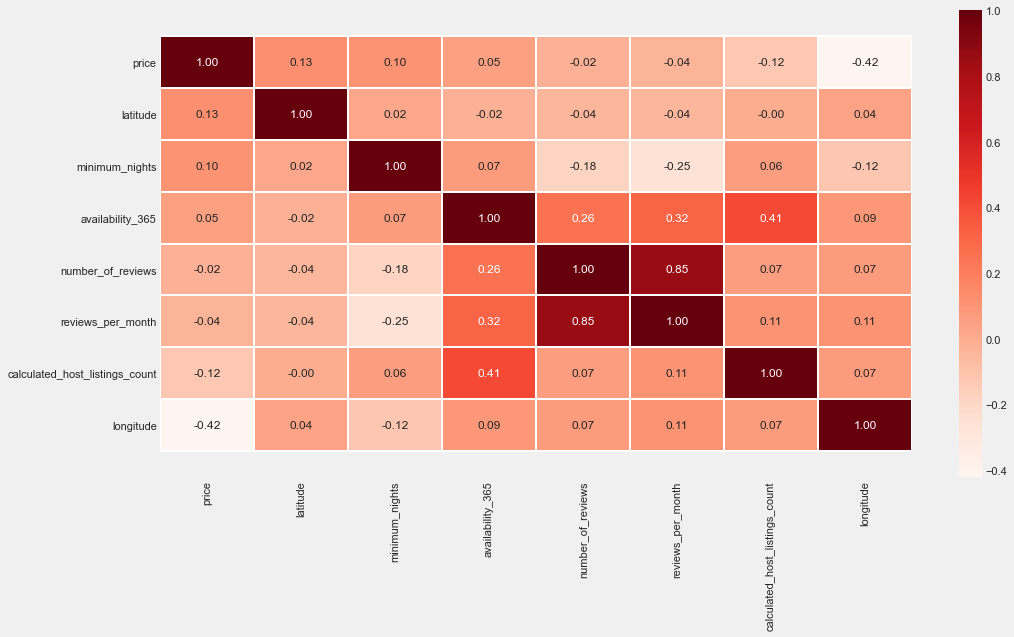

In [77]:
top = 8
corr = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','neighbourhood', 'neighbourhood_group', 'room_type', 'availability_365']].corr(method='spearman')
top8 = abs(corr.nlargest(top,'price')['price']).index
corr_top8 = df[top8].corr(method='spearman')
plt.figure(figsize=(15,8))
ax = sns.heatmap(corr_top8, annot=True, linewidths=0.1, fmt='.2f', cmap='Reds', annot_kws={'size':12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('corr.png')

In [78]:
df

neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Manhattan             Midtown  40.75362  -73.98377   
2               Manhattan              Harlem  40.80902  -73.94190   
3                Brooklyn        Clinton Hill  40.68514  -73.95976   
4               Manhattan         East Harlem  40.79851  -73.94399   
...                   ...                 ...       ...        ...   
45861            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
45862            Brooklyn            Bushwick  40.70184  -73.93317   
45863           Manhattan              Harlem  40.81475  -73.94867   
45864           Manhattan      Hell's Kitchen  40.75751  -73.99112   
45865           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type     price  minimum_nights  number_of_reviews  \
0         Private room  6.222491        0.000000           1.994335   
1      Entire home/apt  6.861501        0.000000           3.026804   
2         Private room  6.232686        0.860569           0.000000   
3      Entire home/apt  5.454105        0.000000           3.998838   
4      Entire home/apt  5.299256        1.414384           1.994335   
...                ...       ...             ...                ...   
45861     Private room  5.107252        0.592677           0.000000   
45862     Private room  4.325650        1.022272           0.000000   
45863  Entire home/apt  5.832106        1.414384           0.000000   
45864      Shared room  4.765909        0.000000           0.000000   
45865     Private room  5.470415        1.281198           0.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  
0               0.172791                        0.685366          0.543327  
1               0.273367                        0.453784          0.543326  
2               0.000000                        0.000000          0.543327  
3               0.798599                        0.000000          0.543304  
4               0.090706                        0.000000          0.000000  
...                  ...                             ...               ...  
45861           0.000000                        0.453784          0.535492  
45862           0.000000                        0.453784          0.542631  
45863           0.000000                        0.000000          0.542158  
45864           0.000000                        0.685366          0.471402  
45865           0.000000                        0.000000          0.541771  

[45866 rows x 11 columns]

# Label Encoding

In [79]:
#label Encoding
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(df['neighbourhood_group'])
df['neighbourhood_group']=le.transform(df['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(df['neighbourhood'])
df['neighbourhood']=le.transform(df['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(df['room_type'])
df['room_type']=le.transform(df['room_type'])

df.sort_values(by='price',ascending=True,inplace=True)

df.head()

neighbourhood_group  neighbourhood  latitude  longitude  room_type  \
29732                    2            111  40.74408  -73.97803          1   
33685                    1             13  40.69508  -73.95164          0   
31053                    1            189  40.66242  -73.99464          0   
31709                    1            213  40.70959  -73.95693          1   
26483                    1             90  40.72421  -73.95364          0   

          price  minimum_nights  number_of_reviews  reviews_per_month  \
29732  2.540825        1.133641           2.985308           0.723222   
33685  2.540825        0.860569           1.601175           0.334670   
31053  2.540825        0.000000           2.288614           0.506822   
31709  2.540825        0.000000           0.000000           0.000000   
26483  2.540825        0.000000           3.445207           0.801162   

       calculated_host_listings_count  availability_365  
29732                             0.0          0.471402  
33685                             0.0          0.000000  
31053                             0.0          0.515242  
31709                             0.0          0.543181  
26483                             0.0          0.542465

# Linear Regression

In [80]:
lm = LinearRegression()

X = df[['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression()

In [81]:
'''Get Predictions & Print Metrics'''
predict = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predict)),
        r2_score(y_test,predict) * 100,
        mean_absolute_error(y_test,predict)
        ))


        Mean Squared Error: 0.6328136552374611
        R2 Score: 45.6943132549172
        Mean Absolute Error: 0.5029052556400877
     


In [82]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predict.flatten()}).head(20)

error_airbnb.head(5)

Actual Values  Predicted Values
0       6.232686          6.216741
1       6.668794          6.104454
2       6.512786          6.236588
3       6.312074          5.072922
4       6.826085          5.333169

   Actual Values  Predicted Values
0       6.232686          6.216741
1       6.668794          6.104454
2       6.512786          6.236588
3       6.312074          5.072922
4       6.826085          5.333169


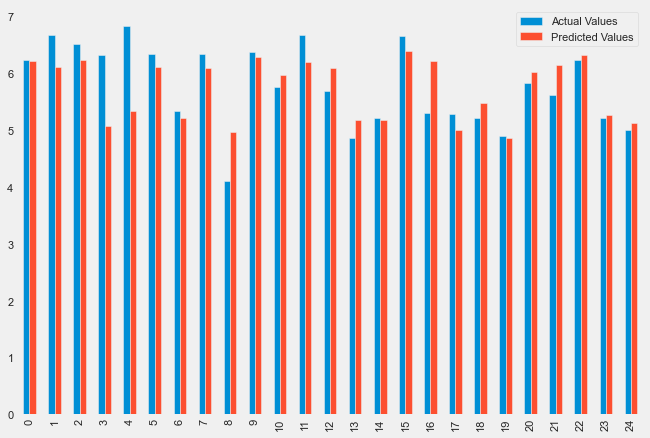

In [83]:
#Error
error_airbnb = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predict.flatten()})
print(error_airbnb.head(5))    

#Visualize the error
df1 = error_airbnb.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

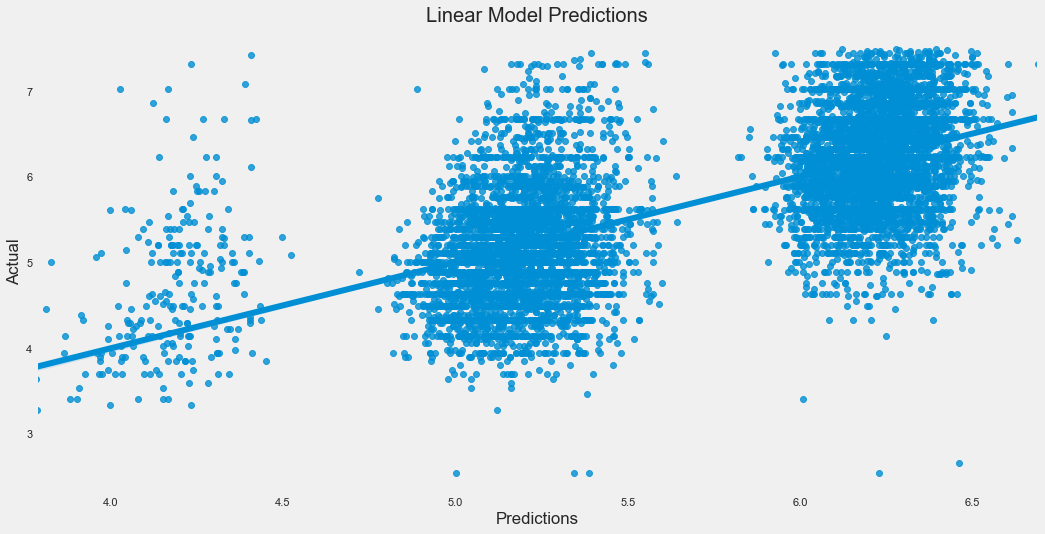

In [84]:
plt.figure(figsize=(16,8))
sns.regplot(predict,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

# Random Forest Regressor

In [85]:
rfr_reg = RandomForestRegressor(random_state=42)
rfr_reg.fit(X_train, y_train) 

RandomForestRegressor(random_state=42)

In [87]:
'''Get Predictions & Metrics'''
predict = rfr_reg.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predict)),
        r2_score(y_test,predict) * 100,
        mean_absolute_error(y_test,predict)
        ))


        Mean Squared Error: 0.5459021159739333
        R2 Score: 59.58680546932666
        Mean Absolute Error: 0.41654674626099863
     


In [88]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predict.flatten()}).head(20)

error_airbnb.head(5)

Actual Values  Predicted Values
0       6.232686          6.125018
1       6.668794          6.084562
2       6.512786          6.330540
3       6.312074          5.039851
4       6.826085          5.185413

   Actual Values  Predicted Values
0       6.232686          6.125018
1       6.668794          6.084562
2       6.512786          6.330540
3       6.312074          5.039851
4       6.826085          5.185413


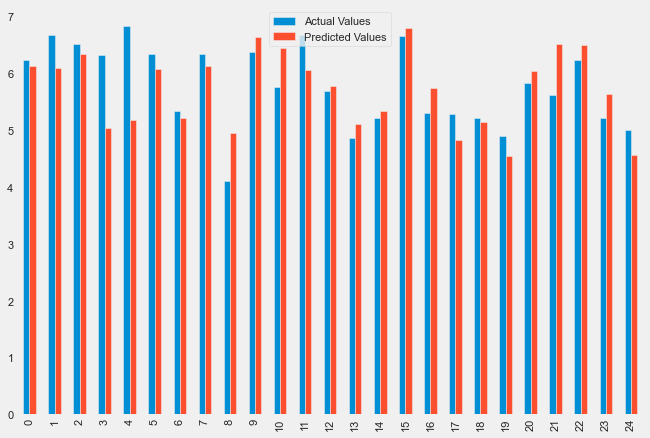

In [89]:
error_airbnb = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predict.flatten()})
print(error_airbnb.head(5))    #predicts= y_pred

#Visualize the error
df1 = error_airbnb.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

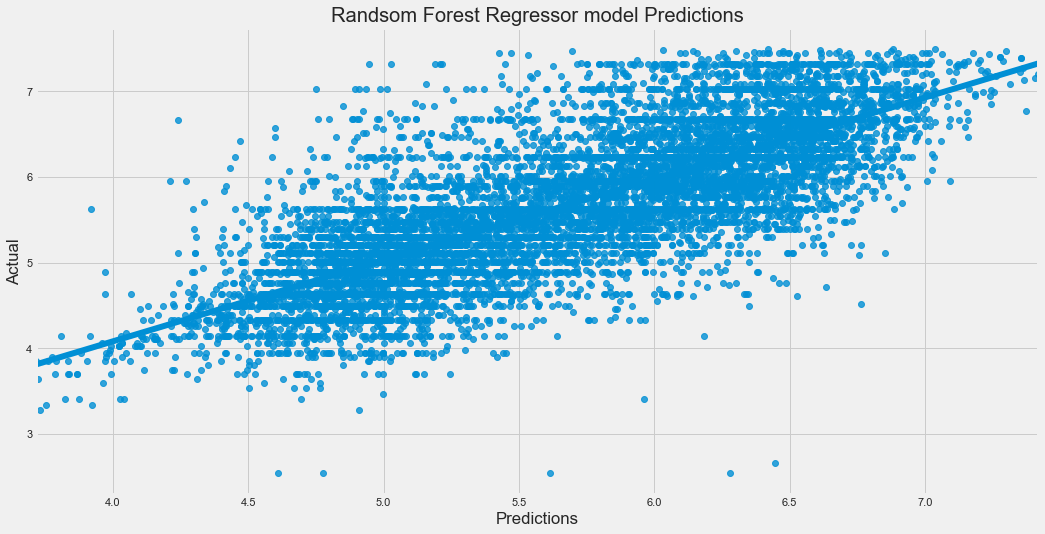

In [90]:
plt.figure(figsize=(16,8))
sns.regplot(predict,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Randsom Forest Regressor model Predictions")
plt.show()

# Gradient Boost Regressor Model 

In [91]:
'''Gradient Boosted Regressor'''
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=3000)

In [92]:
'''Get Predictions & Metrics'''
predicts2 = GBoost.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predict)),
        r2_score(y_test,predict) * 100,
        mean_absolute_error(y_test,predict)
        ))


        Mean Squared Error: 0.5459021159739333
        R2 Score: 59.58680546932666
        Mean Absolute Error: 0.41654674626099863
     


In [93]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predict.flatten()}).head(20)

error_airbnb.head(5)

Actual Values  Predicted Values
0       6.232686          6.125018
1       6.668794          6.084562
2       6.512786          6.330540
3       6.312074          5.039851
4       6.826085          5.185413

   Actual Values  Predicted Values
0       6.232686          6.125018
1       6.668794          6.084562
2       6.512786          6.330540
3       6.312074          5.039851
4       6.826085          5.185413


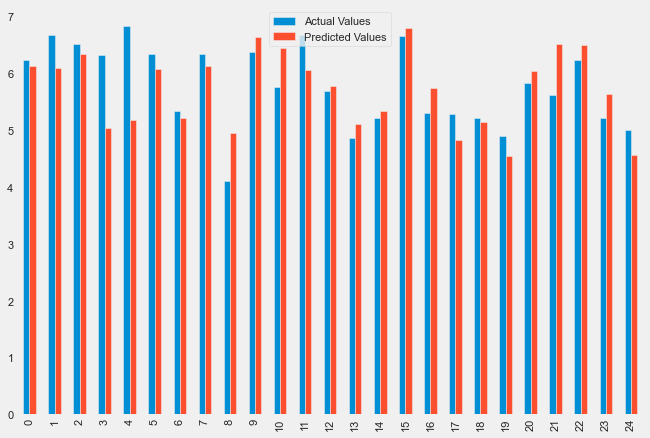

In [94]:
error_airbnb = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predict.flatten()})
print(error_airbnb.head(5))   

#Visualize the error
df1 = error_airbnb.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

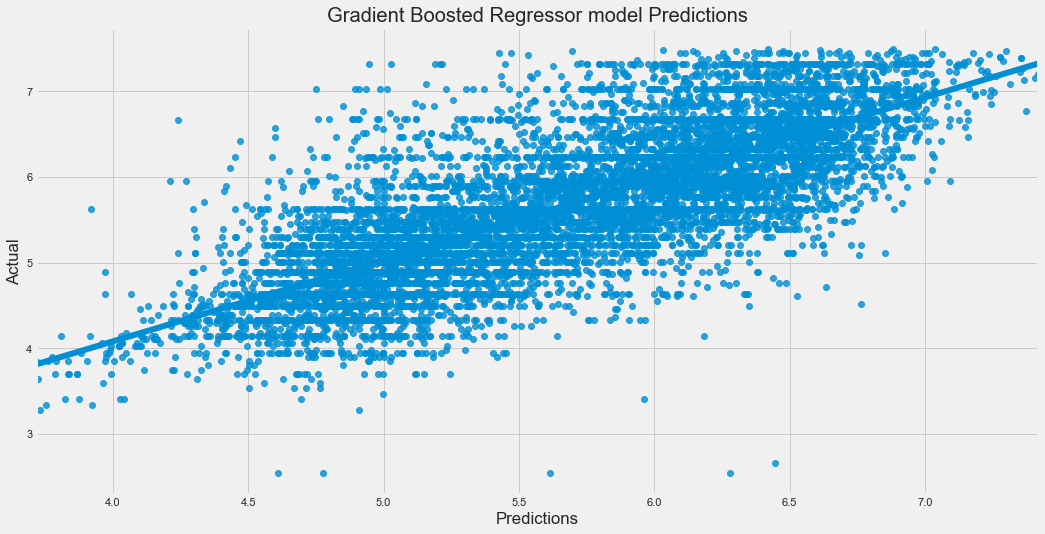

In [95]:
plt.figure(figsize=(16,8))
sns.regplot(predict,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Gradient Boosted Regressor model Predictions")
plt.show()